<a href="https://colab.research.google.com/github/JGrant3101/ME4MachineLearning/blob/main/Tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import numpy as np


def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.transpose())
    return covar


def gen_circular_distribution(n=500, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_simple_circular_distribution(n=100, scale=1):
    a = np.round(n/3).astype('int')
    b = n-a
    r1 = np.random.normal(loc=0, scale=scale, size=[a, 1])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_xor_distribution(n=100):
    a = np.round(n / 4).astype('int')
    b = n-a*3
    xc1 = np.concatenate([np.random.multivariate_normal([-2.3, -2.3], get_cov(0.4, 0.1, -45), a),
                          np.random.multivariate_normal([2.3, 2.3], get_cov(0.4, 0.1, -45), a)])
    xc2 = np.concatenate([np.random.multivariate_normal([-2.3, 2.3], get_cov(0.4, 0.1, 45), a),
                          np.random.multivariate_normal([2.3, -2.3], get_cov(0.4, 0.1, 45), b)])
    xc = np.array(np.concatenate([xc1, xc2]))

    y = np.array(np.concatenate([np.zeros([2 * a, 1]), np.ones([a+b, 1])])).squeeze()
    X = xc
    return X, y


Above is the code given to us by Peter to use throughout the tutorial.

In [161]:
# Here I'm importing all the other libaries which have been used in previous tutorials in case they come up again
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import pandas
import plotly.graph_objects as go
import sys

# Setting random seed so our results don't change each time the code is rerun
np.random.seed(0)

Question 1

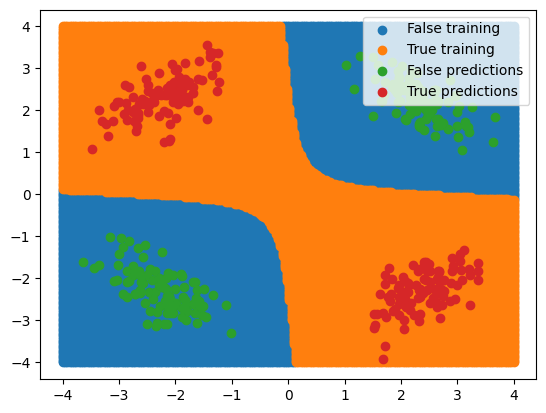

In [162]:
# Generating a XOR dataset
X, y = gen_xor_distribution(400)

# Defining a support vector machine
svm = SVC(C = 0.01, gamma = 'auto', kernel = 'poly', degree = 2)

# Fitting
svm.fit(X, y)

# Creating a sample of X points
x1line = np.linspace(-4, 4, 200)
x2line = np.linspace(-4, 4, 200)
x1mesh, x2mesh = np.meshgrid(x1line, x2line)
Xmesh = np.array([x1mesh, x2mesh]).reshape([2, 200*200]).T

# Predicting the classification for all of the sample X points
results = svm.predict(Xmesh)

# Plotting the sample data over the training data
fig1, ax1 = plt.subplots()
plt.scatter(Xmesh[results==0, 0], Xmesh[results==0,1], label = 'False training')
plt.scatter(Xmesh[results==1, 0], Xmesh[results==1,1], label = 'True training')
plt.scatter(X[y==0, 0], X[y==0,1], label = 'False predictions')
plt.scatter(X[y==1, 0], X[y==1,1], label = 'True predictions')
plt.legend()


Above we have generated a XOR distribution, fit a second order polynomial support vector machine to this distribution, predicted results for a grid of values using the support vector machine and then plotted the two on top of each other to verify if the predictions are any good.

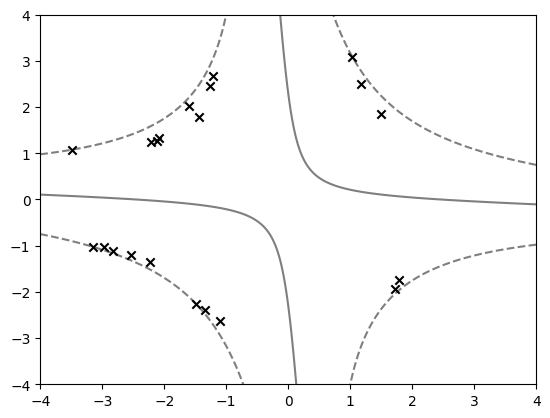

In [163]:
# Getting the decision function
decision = svm.decision_function(Xmesh)
decision = np.reshape(decision, [200, 200])

# Plotting contours
fig2, ax2 = plt.subplots()
ax2.contour(x1line, x2line, decision, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])

# Finding the support vectors
sv = svm.support_vectors_

# Plotting these
plt.scatter(sv[:,0], sv[:,1], marker = 'x', c = '#000000')

In the above plot the sloid lines are the decision boundary while the two dashed line show the extent of the margins. The black crosses show the support vectors that the support vector machine has used.

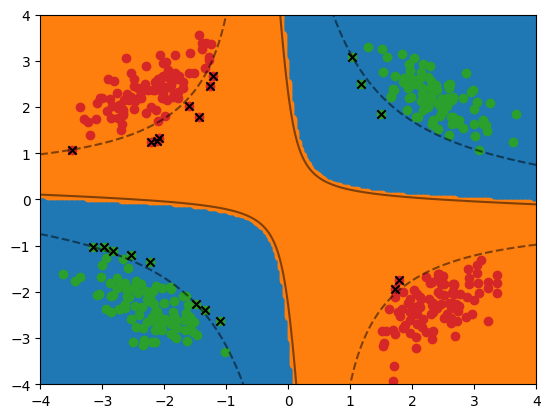

In [164]:
# Plotting everything together
fig3, ax3 = plt.subplots()
plt.scatter(Xmesh[results==0, 0], Xmesh[results==0,1])
plt.scatter(Xmesh[results==1, 0], Xmesh[results==1,1])
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
ax3.contour(x1line, x2line, decision, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
plt.scatter(sv[:,0], sv[:,1], marker = 'x', c = '#000000')

Question 2

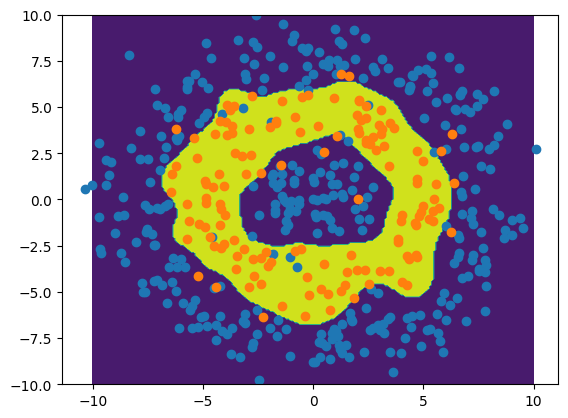

In [165]:
# Generating a circular distribution with 500 points
Xcircle, ycircle = gen_circular_distribution(500)

# Defining a support vector machine
svmcircle = SVC(C = 2, gamma = 'auto', kernel = 'rbf', degree = 3)

# Fitting
svmcircle.fit(Xcircle, ycircle)

# Creating a sample of X points
x1linecircle = np.linspace(-10, 10, 201)
x2linecircle = np.linspace(-10, 10, 201)
x1meshcircle, x2meshcircle = np.meshgrid(x1linecircle, x2linecircle)
Xmeshcircle = np.array([x1meshcircle, x2meshcircle]).reshape([2, 201*201]).T

# Predicting the classification for all of the sample X points
resultscircle = svmcircle.predict(Xmeshcircle)
resultscircle = np.reshape(resultscircle, [201, 201])

# Plotting
fig4, ax4 = plt.subplots()
plt.contourf(x1linecircle, x2linecircle, resultscircle)
plt.scatter(Xcircle[ycircle==0, 0], Xcircle[ycircle==0,1])
plt.scatter(Xcircle[ycircle==1, 0], Xcircle[ycircle==1,1])
#ax3.contour(x1line, x2line, decision, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
#plt.scatter(sv[:,0], sv[:,1], marker = 'x', c = '#000000')



Above we have scattered the raw input values to our svm and a contour of a mesh of points and their corresponding predicted class.

In [166]:
# Setting up a k fold cross validation
kf = KFold(n_splits = 5, shuffle = True)

# Defining empty arrays to add our fraction values to so an average can be calculated at the end
testfractions = 0
trainfractions = 0
a = 0;

for train_index, test_index in kf.split(Xcircle):
  X_train = Xcircle[train_index]
  y_train = ycircle[train_index]
  X_test = Xcircle[test_index]
  y_test = ycircle[test_index]

  # Use X_train, y_train to train the SVM
  svmcircle.fit(X_train, y_train)
  # Use svm.predict() to predict the output for the test data set
  testresults = svmcircle.predict(X_test)
  # loop through to compare the test data output to what it should be and obtain the fraction of correct classifications
  count = 0
  for i in range(len(y_test)):
    if y_test[i] == testresults[i]:
      count = count+1
  testfractions = testfractions + (count / len(y_test))
  # Do the same prediction and assessment performance with the training data
  count = 0
  trainresults = svmcircle.predict(X_train)
  for i in range(len(y_train)):
    if y_train[i] == trainresults[i]:
      count = count+1
  trainfractions = trainfractions + (count / len(y_train))

# Dividing the sum of 5 fraction values to get the average
testfraction = testfractions/5
trainfraction = trainfractions/5

# Printing the final accuracy values
print(testfraction)
print(trainfraction)



0.914
0.9515


Above we have set up a k fold cross validation then run it, calculating the fraction of values which are predicted correctly, both from the unseen test dataset and the training dataset. By varying C we can impact that tightening up the rigidity of the boundaries has.

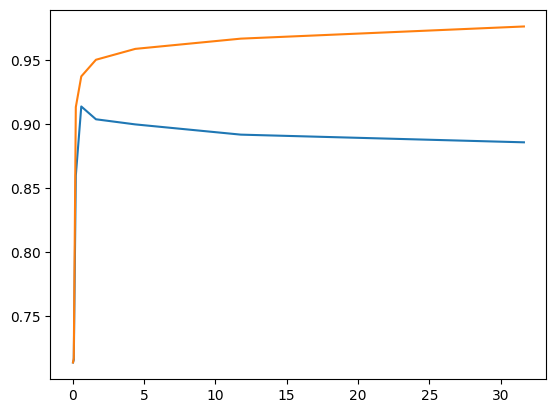

In [167]:
# Graphing both fractions as functions of C
# Creating a C array
C_array = np.power(10, np.linspace(-1.5, 1.5, 8))
# Defining empty arrays
avgcgraphtestfractions = []
avgcgraphtrainfractions = []
for c in range(len(C_array)):
  svmfunky = SVC(C = C_array[c], gamma = 'auto', kernel = 'rbf', degree = 3)
  cgraphtestfractions = []
  cgraphtrainfractions = []
  for train_index, test_index in kf.split(Xcircle):
    X_train = Xcircle[train_index]
    y_train = ycircle[train_index]
    X_test = Xcircle[test_index]
    y_test = ycircle[test_index]

    # Use X_train, y_train to train the SVM
    svmfunky.fit(X_train, y_train)
    # Use svm.predict() to predict the output for the test data set
    testresults = svmfunky.predict(X_test)
    # loop through to compare the test data output to what it should be and obtain the fraction of correct classifications
    count = 0
    for i in range(len(y_test)):
      if y_test[i] == testresults[i]:
        count = count+1
    cgraphtestfractions = np.append(cgraphtestfractions, count / len(y_test))
    # Do the same prediction and assessment performance with the training data
    count = 0
    trainresults = svmfunky.predict(X_train)
    for i in range(len(y_train)):
      if y_train[i] == trainresults[i]:
        count = count+1
    cgraphtrainfractions = np.append(cgraphtrainfractions, count / len(y_train))
  avgcgraphtestfractions = np.append(avgcgraphtestfractions, np.mean(cgraphtestfractions))
  avgcgraphtrainfractions = np.append(avgcgraphtrainfractions, np.mean(cgraphtrainfractions))

# Plotting
fig4, ax4 = plt.subplots()
plt.plot(C_array, avgcgraphtestfractions, label = 'test')
plt.plot(C_array, avgcgraphtrainfractions, label = 'train')